<a href="https://colab.research.google.com/github/mervekaracaoglu/Data-Science/blob/main/CS210_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Merve Karacaoğlu 32282

I made some changes for Step 2 and all steps of the project are in this code.

In [ ]:
import numpy as np
import pandas as pd
from os.path import join
import matplotlib.pyplot as plt
import statsmodels.api as sm

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

path_prefix = "/content/drive/My Drive/CS210 Project"

Mounted at /content/drive


#Data sets
For this project I found stay-at-home requirement levels between 2020 to 2023. I will compare the stay-home requirement levels around the world with Amazon Stock Market volume/price.

Data set: https://ourworldindata.org/grapher/stay-at-home-covid

#First Data set
US Stock Market Data 2019 to 2024


In [ ]:
stock_market = "Stock Market Dataset.csv"
df_stock_price = pd.read_csv(join(path_prefix, stock_market))
df_stock_price.head()

,Unnamed: 0,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,0,02-02-2024,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650.0,...,"5,89,498",10580.0,564.64,4030000.0,171.81,117220000.0,474.99,84710000.0,"2,053.70",NaN
1,1,01-02-2024,2.050,161340.0,73.82,577940.0,3.8535,NaN,"43,081.40",47690.0,...,"5,81,600",9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,"2,071.10",260920.0
2,2,31-01-2024,2.100,142860.0,75.85,344490.0,3.9060,NaN,"42,580.50",56480.0,...,"5,78,020",9720.0,564.11,4830000.0,155.20,49690000.0,390.14,20010000.0,"2,067.40",238370.0
3,3,30-01-2024,2.077,139750.0,77.82,347240.0,3.9110,NaN,"42,946.20",55130.0,...,"5,84,680",9750.0,562.85,6120000.0,159.00,42290000.0,400.06,18610000.0,"2,050.90",214590.0
4,4,29-01-2024,2.490,3590.0,76.78,331930.0,3.8790,NaN,"43,299.80",45230.0,...,"5,78,800",13850.0,575.79,6880000.0,161.26,42840000.0,401.02,17790000.0,"2,034.90",1780.0


In [ ]:
df_amazon_price = df_stock_price[['Date', 'Amazon_Price', 'Amazon_Vol.']]
df_amazon_price.head()

,Date,Amazon_Price,Amazon_Vol.
0,02-02-2024,171.81,117220000.0
1,01-02-2024,159.28,66360000.0
2,31-01-2024,155.20,49690000.0
3,30-01-2024,159.00,42290000.0
4,29-01-2024,161.26,42840000.0


In [ ]:
print(df_amazon_price.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1243 non-null   object 
 1   Amazon_Price  1243 non-null   float64
 2   Amazon_Vol.   1243 non-null   float64
dtypes: float64(2), object(1)
memory usage: 29.3+ KB
None


In [ ]:
print(df_amazon_price.describe())

       Amazon_Price   Amazon_Vol.
count   1243.000000  1.243000e+03
mean     128.683234  7.413005e+07
std       30.808631  3.245753e+07
min       79.410000  1.763000e+07
25%       96.260000  5.264500e+07
50%      128.730000  6.520000e+07
75%      158.110000  8.674500e+07
max      186.570000  3.113500e+08


In [ ]:
df_amazon_price['Date'] = pd.to_datetime(df_amazon_price['Date'], format='%d-%m-%Y')
df_amazon_price.set_index('Date', inplace=True)
df_amazon_price.head()

<ipython-input-88-d42fbc29177f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_amazon_price['Date'] = pd.to_datetime(df_amazon_price['Date'], format='%d-%m-%Y')


,Amazon_Price,Amazon_Vol.
Date,,
2024-02-02,171.81,117220000.0
2024-02-01,159.28,66360000.0
2024-01-31,155.20,49690000.0
2024-01-30,159.00,42290000.0
2024-01-29,161.26,42840000.0


**Daily Amazon Stock Prices**

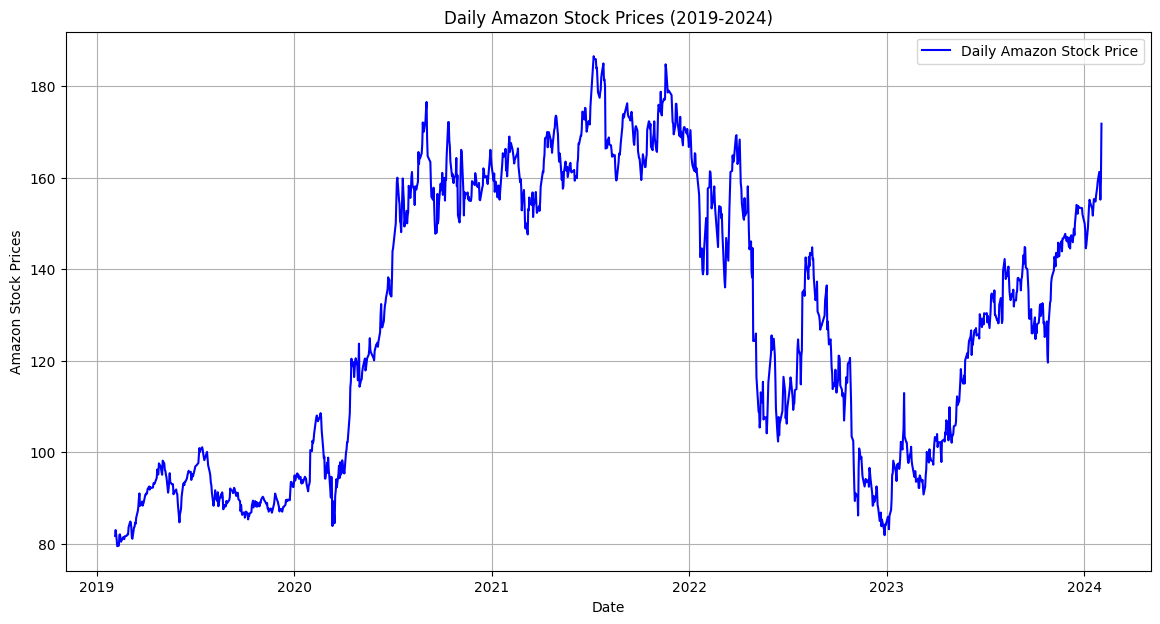

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(df_amazon_price['Amazon_Price'], label='Daily Amazon Stock Price', color='blue')
plt.title('Daily Amazon Stock Prices (2019-2024)')
plt.xlabel('Date')
plt.ylabel('Amazon Stock Prices')
plt.legend()
plt.grid(True)
plt.show()

**Daily Amazon Trading Volume**

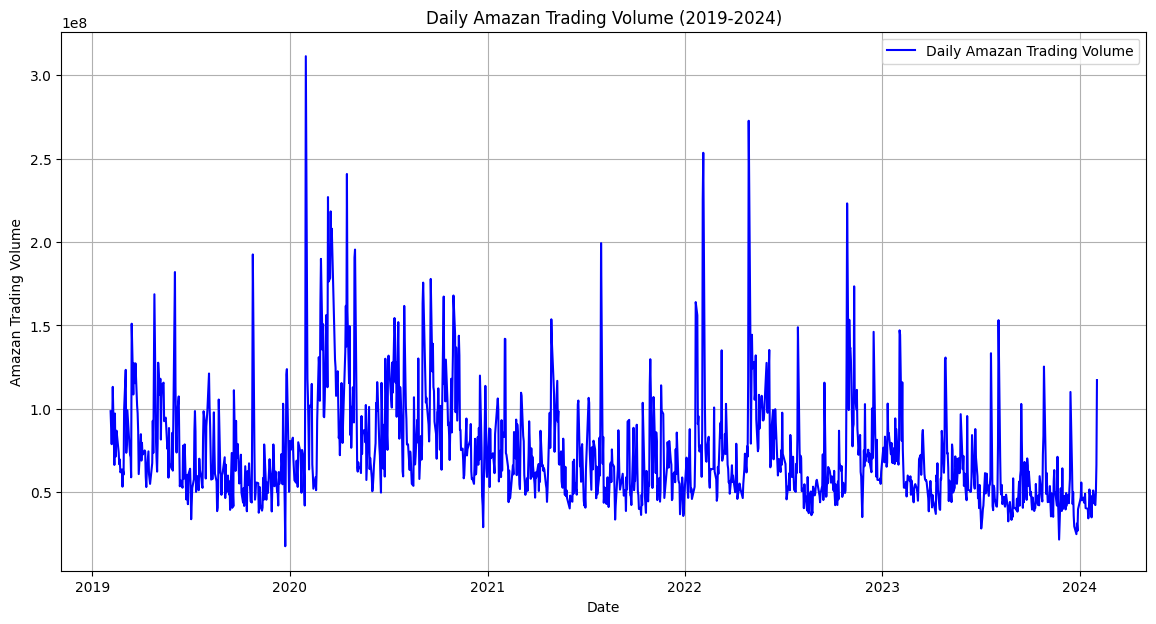

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(df_amazon_price['Amazon_Vol.'], label='Daily Amazan Trading Volume', color='blue')
plt.title('Daily Amazan Trading Volume (2019-2024)')
plt.xlabel('Date')
plt.ylabel('Amazan Trading Volume')
plt.legend()
plt.grid(True)
plt.show()

#Second Data set
Stay-at-home requirements during the COVID-19 pandemic, 2020-2023.

In [ ]:
stay_home = "stay-at-home-covid.csv"
df_stay_home = pd.read_csv(join(path_prefix, stay_home))

In [ ]:
df_stay_home.head()

,Entity,Code,Day,stay_home_requirements
0,Afghanistan,AFG,2020-01-01,0
1,Afghanistan,AFG,2020-01-02,0
2,Afghanistan,AFG,2020-01-03,0
3,Afghanistan,AFG,2020-01-04,0
4,Afghanistan,AFG,2020-01-05,0


In [ ]:
print(df_stay_home.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202760 entries, 0 to 202759
Data columns (total 4 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Entity                  202760 non-null  object
 1   Code                    202760 non-null  object
 2   Day                     202760 non-null  object
 3   stay_home_requirements  202760 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 6.2+ MB
None


In [ ]:
print(df_stay_home.describe(include='all'))

             Entity    Code         Day  stay_home_requirements
count        202760  202760      202760           202760.000000
unique          185     185        1096                     NaN
top     Afghanistan     AFG  2020-01-01                     NaN
freq           1096    1096         185                     NaN
mean            NaN     NaN         NaN                0.742050
std             NaN     NaN         NaN                0.915834
min             NaN     NaN         NaN                0.000000
25%             NaN     NaN         NaN                0.000000
50%             NaN     NaN         NaN                0.000000
75%             NaN     NaN         NaN                2.000000
max             NaN     NaN         NaN                3.000000


In [ ]:
df_stay_home.head()

,Entity,Code,Day,stay_home_requirements
0,Afghanistan,AFG,2020-01-01,0
1,Afghanistan,AFG,2020-01-02,0
2,Afghanistan,AFG,2020-01-03,0
3,Afghanistan,AFG,2020-01-04,0
4,Afghanistan,AFG,2020-01-05,0


In [ ]:
df_stay_home['Day'] = pd.to_datetime(df_stay_home['Day'], format='%Y-%m-%d')
df_stay_home.set_index('Day', inplace=True)
df_stay_home.head()

,Entity,Code,stay_home_requirements
Day,,,
2020-01-01,Afghanistan,AFG,0
2020-01-02,Afghanistan,AFG,0
2020-01-03,Afghanistan,AFG,0
2020-01-04,Afghanistan,AFG,0
2020-01-05,Afghanistan,AFG,0


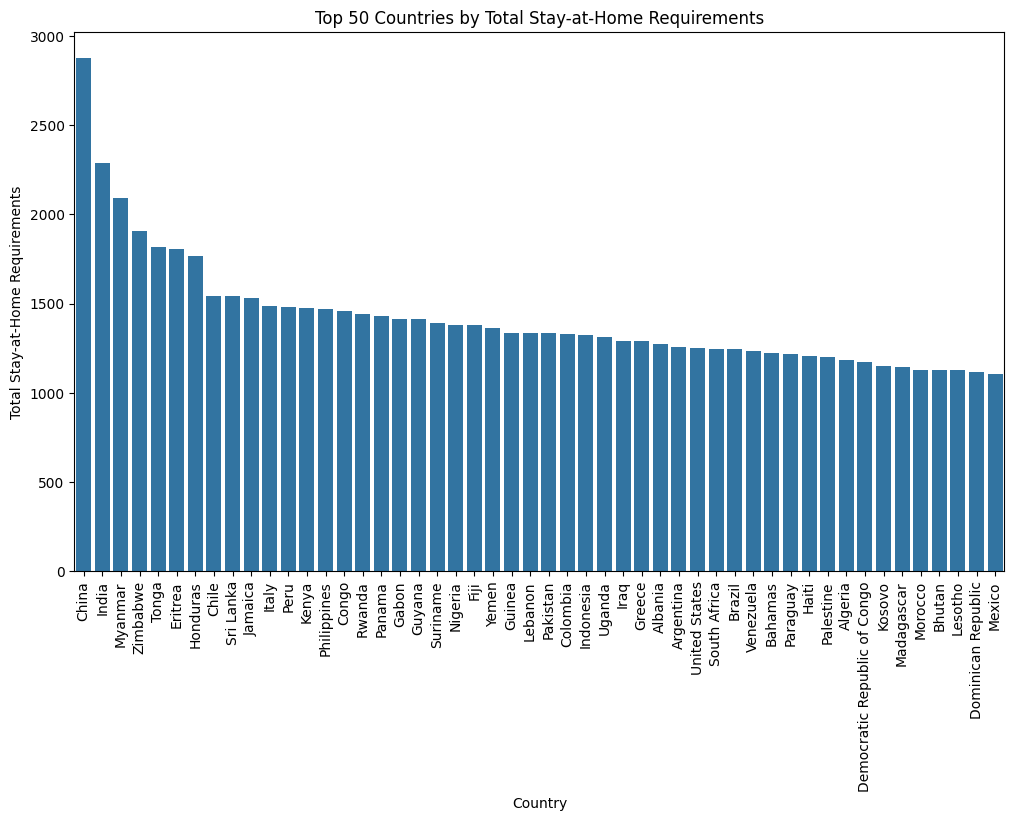

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_stay_home_agg = df_stay_home.groupby('Entity')['stay_home_requirements'].sum().reset_index()

df_stay_home_top50 = df_stay_home_agg.sort_values(by='stay_home_requirements', ascending=False).head(50)

plt.figure(figsize=(12, 7))
sns.barplot(x='Entity', y='stay_home_requirements', data=df_stay_home_top50, estimator=sum, errorbar=None)
plt.title('Top 50 Countries by Total Stay-at-Home Requirements')
plt.xlabel('Country')
plt.ylabel('Total Stay-at-Home Requirements')
plt.xticks(rotation=90)
plt.show()


# NaN-Values

In [ ]:
missing_df_amazon_price = df_amazon_price.isnull().mean()
print("Percentage of missing values in monthly_oil_price:")
print(missing_df_amazon_price)

Percentage of missing values in monthly_oil_price:
Amazon_Price    0.0
Amazon_Vol.     0.0
dtype: float64


In [ ]:
missing_stay_home = df_stay_home.isnull().mean()
print("Percentage of missing values in monthly_oil_price:")
print(missing_stay_home)

Percentage of missing values in monthly_oil_price:
Entity                    0.0
Code                      0.0
stay_home_requirements    0.0
dtype: float64


# Monthly Data

In [ ]:
amazon_stock = df_amazon_price[['Amazon_Price', 'Amazon_Vol.']]
stay_home = df_stay_home[['stay_home_requirements']]

#resampling the data to monthly averages
amazon_price_monthly = amazon_stock.resample('M').mean()
stay_home_monthly = stay_home.resample('M').mean()


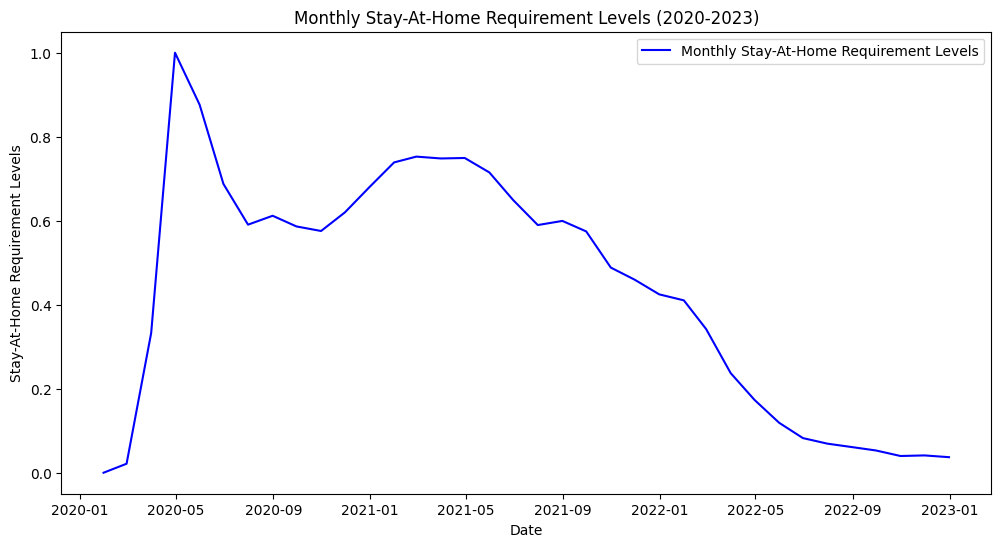

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(stay_home_monthly['stay_home_requirements'], label='Monthly Stay-At-Home Requirement Levels', color='blue')
plt.title('Monthly Stay-At-Home Requirement Levels (2020-2023)')
plt.xlabel('Date')
plt.ylabel('Stay-At-Home Requirement Levels')
plt.legend()
plt.show()

Text(0, 0.5, 'Amazon Price')

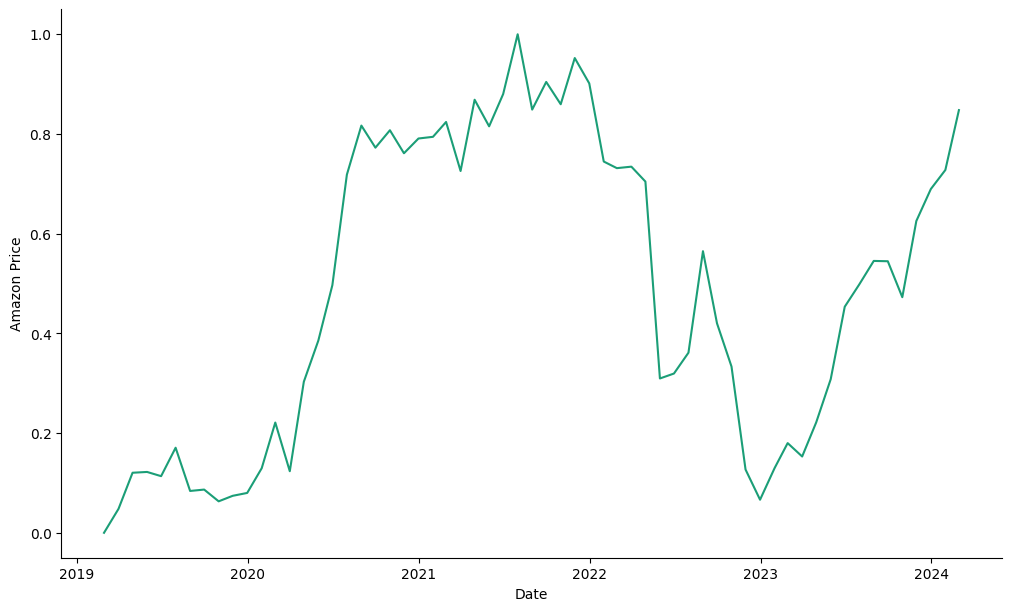

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

def plot_df(df, df_name, df_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  df = df.reset_index()
  x_axis = df['Date']
  y_axis = df['Amazon_Price']

  plt.plot(x_axis, y_axis, label=df_name, color=palette[df_index % len(palette)])


fig, ax = plt.subplots(figsize=(10, 6), layout = 'constrained')
df_sort = amazon_price_monthly.sort_values('Date', ascending = True)
plot_df(df_sort, 'Amazon Stock Prices ')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
plt.ylabel('Amazon Price')


Text(0, 0.5, 'Amazon Vol.')

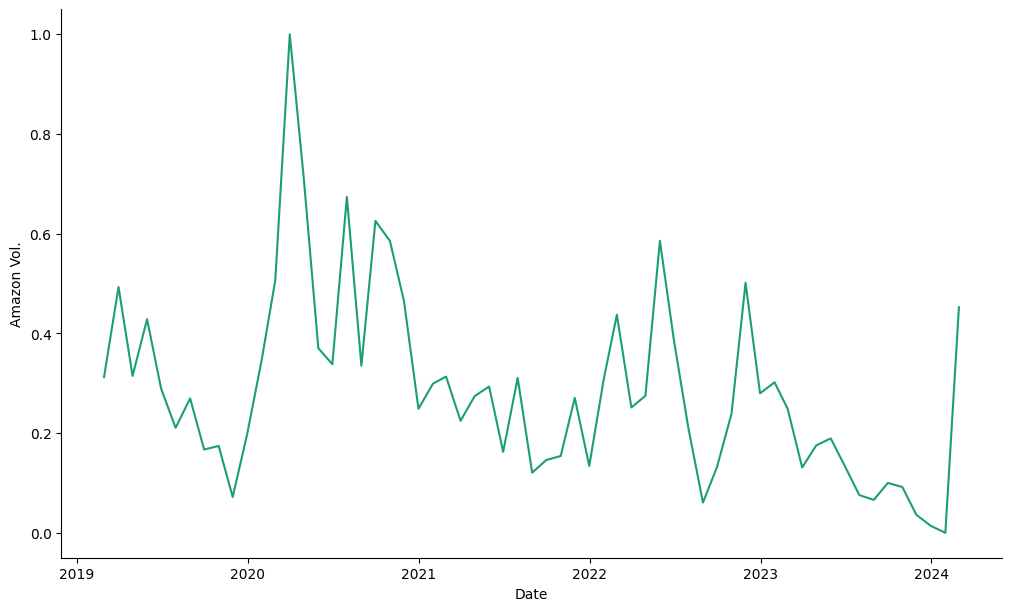

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

def plot_df(df, df_name, df_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  df = df.reset_index()
  x_axis = df['Date']
  y_axis = df['Amazon_Vol.']

  plt.plot(x_axis, y_axis, label=df_name, color=palette[df_index % len(palette)])


fig, ax = plt.subplots(figsize=(10, 6), layout = 'constrained')
df_sort = amazon_price_monthly.sort_values('Date', ascending = True)
plot_df(df_sort, 'Amazon Trading Volume')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
plt.ylabel('Amazon Vol.')


**Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

amazon_price_monthly[['Amazon_Price']] = scaler.fit_transform(amazon_price_monthly[['Amazon_Price']])
stay_home_monthly['stay_home_requirements'] = scaler.fit_transform(stay_home_monthly[['stay_home_requirements']])

df_amazon_price.head()

,Amazon_Price,Amazon_Vol.
Date,,
2024-02-02,171.81,117220000.0
2024-02-01,159.28,66360000.0
2024-01-31,155.20,49690000.0
2024-01-30,159.00,42290000.0
2024-01-29,161.26,42840000.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

amazon_price_monthly[['Amazon_Vol.']] = scaler.fit_transform(amazon_price_monthly[['Amazon_Vol.']])
stay_home_monthly['stay_home_requirements'] = scaler.fit_transform(stay_home_monthly[['stay_home_requirements']])

df_amazon_price.head()

,Amazon_Price,Amazon_Vol.
Date,,
2024-02-02,171.81,117220000.0
2024-02-01,159.28,66360000.0
2024-01-31,155.20,49690000.0
2024-01-30,159.00,42290000.0
2024-01-29,161.26,42840000.0


# **Scatter Plots**

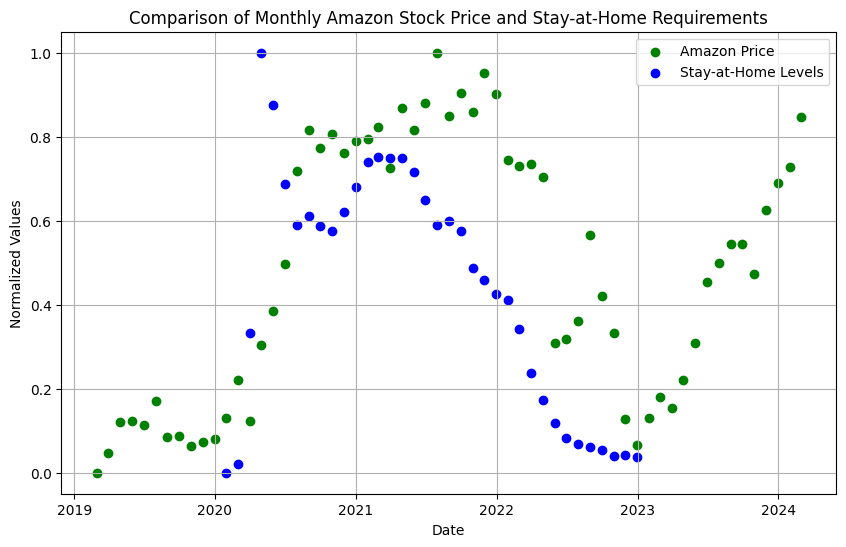

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(amazon_price_monthly.index, amazon_price_monthly['Amazon_Price'], color='green', label='Amazon Price')
plt.scatter(stay_home_monthly.index, stay_home_monthly['stay_home_requirements'], color='blue', label='Stay-at-Home Levels')
plt.title('Comparison of Monthly Amazon Stock Price and Stay-at-Home Requirements')
plt.xlabel('Date')
plt.ylabel('Normalized Values')
plt.legend()
plt.grid(True)
plt.show()

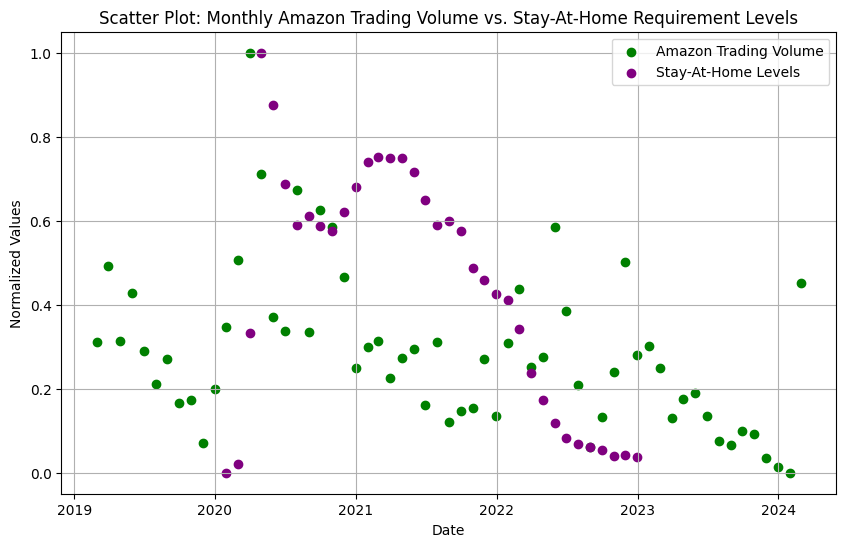

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(amazon_price_monthly.index, amazon_price_monthly['Amazon_Vol.'], color='green', label='Amazon Trading Volume')
plt.scatter(stay_home_monthly.index, stay_home_monthly['stay_home_requirements'], color='purple', label='Stay-At-Home Levels')
plt.title('Scatter Plot: Monthly Amazon Trading Volume vs. Stay-At-Home Requirement Levels')
plt.xlabel('Date')
plt.ylabel('Normalized Values')
plt.legend()
plt.grid(True)
plt.show()

# Hypothesis Testing
**Hypothesis 1: Impact of Stay-Home-Requirement Levels on Amazon Stock Prices**

**Null Hypothesis (H0):** There is a significant correlation between monthly Amazon Stock Prices and the stay-home-requirement levels.

**Alternative Hypothesis (H1):** There is no correlation between monthly Amazon Stock Prices and the stay-home-requirement levels.



**Hypothesis 2: Impact of Stay-Home-Requirement Levels on Amazon Trading Volume.**

**Null Hypothesis (H0):** There is a significant correlation between monthly Amazon stock traded and the stay-home-requirement levels.

**Alternative Hypothesis (H1):** There is no correlation between monthly Amazon stock traded and the stay-home-requirement levels.

In [ ]:
merged_data = pd.merge(amazon_price_monthly, stay_home_monthly, left_index=True, right_index=True, how='inner')
merged_data.head()

,Amazon_Price,Amazon_Vol.,stay_home_requirements
2020-01-31,0.129529,0.347115,0.000000
2020-02-29,0.221138,0.506409,0.021411
2020-03-31,0.123518,1.000000,0.332781
2020-04-30,0.302976,0.710170,1.000000
2020-05-31,0.385568,0.370234,0.876289


In [ ]:
from scipy.stats import pearsonr

corr_price_quantity, p_value_price_quantity = pearsonr(merged_data['Amazon_Price'], merged_data['stay_home_requirements'])
print("Correlation coefficient (Price vs. Stay-Home Req.):", corr_price_quantity)
print("P-value (Price vs. Stay-Home Req.):", p_value_price_quantity)

corr_volume_quantity, p_value_volume_quantity = pearsonr(merged_data['Amazon_Vol.'], merged_data['stay_home_requirements'])
print("Correlation coefficient (Volume vs. Stay-Home Req.):", corr_volume_quantity)
print("P-value (Volume vs. Stay-Home Req.):", p_value_volume_quantity)


Correlation coefficient (Price vs. Stay-Home Req.): 0.5784415426689398
P-value (Price vs. Stay-Home Req.): 0.00021966298454235525
Correlation coefficient (Volume vs. Stay-Home Req.): 0.08476935885860462
P-value (Volume vs. Stay-Home Req.): 0.6230356881053218


**Amazon Stock Price vs. Stay-At-Home Requirement Levels**

**Correlation coefficient: 0.578**

There is a moderate positive linear relationship between Amazon Price and Stay-At-Home Requirement Levels. As stay-home requirements increase, Amazon prices tend to increase as well.

**P-value: 0.0002**

The p-value is very low (much less than 0.05), indicating that the correlation is statistically significant. The likelihood that this correlation is due to random chance is very small.


**Amazon Trading Volume vs. Stay-At-Home Requirements Levels**

**Correlation coefficient: 0.085**
There is a very weak positive linear relationship between Amazon Trading Volume and Stay-At-Home Requirement Levels. The correlation is so weak that it suggests almost no linear relationship.

**P-value: 0.623**

The p-value is high (greater than 0.05), indicating that the correlation is not statistically significant. This means that any observed correlation is likely due to random chance.

In [ ]:
amazon_price_monthly.head()

,Amazon_Price,Amazon_Vol.
Date,,
2019-02-28,0.000000,0.312105
2019-03-31,0.048094,0.493036
2019-04-30,0.120442,0.314770
2019-05-31,0.122053,0.428412
2019-06-30,0.113603,0.289121


In [ ]:
merged_data.head()

,Amazon_Price,Amazon_Vol.,stay_home_requirements
2020-01-31,0.129529,0.347115,0.000000
2020-02-29,0.221138,0.506409,0.021411
2020-03-31,0.123518,1.000000,0.332781
2020-04-30,0.302976,0.710170,1.000000
2020-05-31,0.385568,0.370234,0.876289


**Null Hypothesis (H0):** There is no difference in the mean quantity of stay-at-home requirement levels between months with high Amazon Stock prices and months with low Amazon Stock Prices.

**Alternative Hypothesis (H1):** There is a significant difference in the mean quantity of stay-at-home requirement levels between months with high Amazon Stock Prices and months with low Amazon Stock Prices.

In [ ]:
median_price = merged_data['Amazon_Price'].median()

high_price_data = merged_data[merged_data['Amazon_Price'] > median_price]['stay_home_requirements']
low_price_data = merged_data[merged_data['Amazon_Price'] <= median_price]['stay_home_requirements']


In [ ]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(high_price_data, low_price_data, equal_var=False)

print("T-Statistic:", t_stat)
print("P-value:", p_value)


T-Statistic: 3.3896463920048627
P-value: 0.0025812228320012598


**T-Statistic: 3.389**
A T-Statistic of 3.389 indicates that the estimated coefficient is 3.39 standard errors away from zero. This is quite far, indicating that there is a large difference in the means of the two groups(high and low prices).

**P-value: 0.0025**
A P-value of 0.0025 is much lower than the common significance level of 0.05. This suggests that the observed difference in mean quantities of stay-at-home requirements between high and low price months is statistically significant at the %5 level.

Based on two-sample t-test, we have sufficient evidence to reject the null hypothesis. Therefore, based on this test, we conclude that there is a significant effect of stay-home-requirement levels on the Amazon Stock Prices.

#Linear Regression

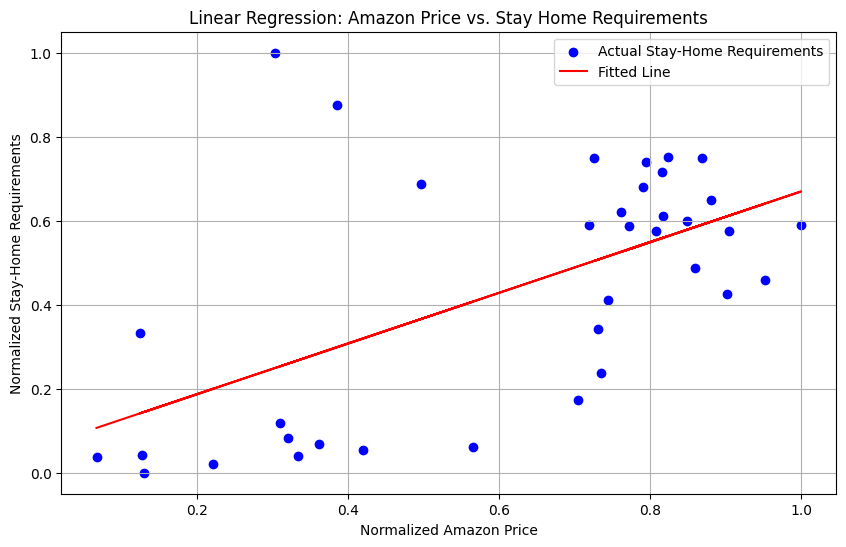

In [ ]:
X = sm.add_constant(merged_data['Amazon_Price'])
Y = merged_data['stay_home_requirements']

model = sm.OLS(Y, X).fit()

merged_data['predicted_stay_home'] = model.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Amazon_Price'], Y, color='blue', label='Actual Stay-Home Requirements')

plt.plot(merged_data['Amazon_Price'], merged_data['predicted_stay_home'], color='red', label='Fitted Line')

plt.title('Linear Regression: Amazon Price vs. Stay Home Requirements')
plt.xlabel('Normalized Amazon Price')
plt.ylabel('Normalized Stay-Home Requirements')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     stay_home_requirements   R-squared:                       0.335
Model:                                OLS   Adj. R-squared:                  0.315
Method:                     Least Squares   F-statistic:                     17.10
Date:                    Tue, 21 May 2024   Prob (F-statistic):           0.000220
Time:                            11:47:22   Log-Likelihood:                 1.2233
No. Observations:                      36   AIC:                             1.553
Df Residuals:                          34   BIC:                             4.720
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const   

#Machine Learning Models

In [ ]:
merged_data

,Amazon_Price,Amazon_Vol.,stay_home_requirements,predicted_stay_home
2020-01-31,0.129529,0.347115,0.000000,0.144801
2020-02-29,0.221138,0.506409,0.021411,0.200037
2020-03-31,0.123518,1.000000,0.332781,0.141177
2020-04-30,0.302976,0.710170,1.000000,0.249382
2020-05-31,0.385568,0.370234,0.876289,0.299181
2020-06-30,0.496739,0.338105,0.687630,0.366212
2020-07-31,0.718378,0.673692,0.590635,0.499850
2020-08-31,0.816822,0.335208,0.611821,0.559207
2020-09-30,0.772554,0.625661,0.586390,0.532516
2020-10-31,0.807447,0.585502,0.575546,0.553555


In [ ]:
from sklearn.model_selection import train_test_split

X = merged_data[['stay_home_requirements']]
y = merged_data['Amazon_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Machine Learning Algorithms**

I applied 3 different machine learning algorithms: Random Forest, kNN and Decision Tree. I tuned and tested their parameters for the best values and fewer errors. Since all the data are normalized, all the values are between 0-1, I calculated the RMSE values. kNN mean squared value is the lowest value compared to others. So kNN is the best ML model for this data set.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

n_neighbors_range = range(1, 11)

best_n_neighbors = None
lowest_rmse = float('inf')

for n_neighbors in n_neighbors_range:
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)

    knn_predictions = knn.predict(X_test)

    knn_mse = mean_squared_error(y_test, knn_predictions)
    knn_rmse = np.sqrt(knn_mse)

    if knn_rmse < lowest_rmse:
        lowest_rmse = knn_rmse
        best_n_neighbors = n_neighbors

print(f'Best n_neighbors: {best_n_neighbors}, Lowest RMSE: {lowest_rmse}')


Best n_neighbors: 8, Lowest RMSE: 0.1527805573339241


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=8)
knn.fit(X_train, y_train)

knn_predictions = knn.predict(X_test)

knn_mse = mean_squared_error(y_test, knn_predictions)
print(f'kNN Mean Squared Error: {knn_mse}')


kNN Mean Squared Error: 0.023341898699264466


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

dt_predictions = dt.predict(X_test)

dt_mse = mean_squared_error(y_test, dt_predictions)
dt_rmse = np.sqrt(dt_mse)
print(f'Decision Tree Root Mean Squared Error (RMSE): {dt_rmse}')


Decision Tree Root Mean Squared Error (RMSE): 0.16267313866079608


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import numpy as np

n_estimators_range = range(10, 50, 10)

best_n_estimators = None
lowest_rmse = float('inf')

for n_estimators in n_estimators_range:

    rf = RandomForestRegressor(n_estimators=n_estimators, random_state=42)

    #cross-validation and the mean RMSE
    cv_scores = -cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(cv_scores).mean()

    if cv_rmse < lowest_rmse:
        lowest_rmse = cv_rmse
        best_n_estimators = n_estimators

print(f'Best n_estimators: {best_n_estimators}, Random Forest RMSE: {lowest_rmse}')


Best n_estimators: 40, Random Forest RMSE: 0.1924539545115953


In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score
knn_mae = mean_absolute_error(y_test, knn_predictions)
knn_r2 = r2_score(y_test, knn_predictions)

print(f'kNN Mean Absolute Error: {knn_mae}')
print(f'kNN R² Score: {knn_r2}')


kNN Mean Absolute Error: 0.12247769157362662
kNN R² Score: 0.6645869949098557


**kNN MAE: 0.122**

An MAE of 0.1225 indicates that the model's predictions are quite accurate on average. The error magnitude is relatively low, which is a positive indication of the model's performance.


**kNN R^2: 0.664**

 An R^2 of 0.665 suggests that the model explains a substantial portion of the variance in the target variable. This indicates a reasonably strong relationship between Stay-at-Home Requirements and Amazon Prices